In [14]:
library(igraph)
library(hash)
library(ggplot2)


hash-2.2.6 provided by Decision Patterns



In [3]:
weighted_movie_g = read_graph("project4_data/q6_movies_weighted.txt",format="ncol", directed = FALSE)


In [8]:
# movie_index = read.delim("project4_data/movie_index.txt", header=FALSE, sep='\t\t')


In [90]:
movies = c('Batman v Superman: Dawn of Justice (2016)',
           'Mission: Impossible - Rogue Nation (2015)',
           'Minions (2015)')

movie_ids = c('9301',
            '35402',
            '71445')

movie_hash = hash()
index_file = file('project4_data/index_movies_list.txt', 'r')
index = 0
while(TRUE){
    line = readLines(index_file, n=1)
    if(length(line) == 0){break}
    
    .set(movie_hash, index, substr(line, start = 11, stop = nchar(line)))
    index = index + 1
}


Warning message:
“closing unused connection 5 (project4_data/index_movies_list.txt)”Warning message:
“closing unused connection 7 (project4_data/movie_index.txt)”

In [110]:
rating_hash = hash()
rating_file = file('project4_data/movie_rating_fixed.txt','r')
while(TRUE){
    line = readLines(rating_file,  n=1)
    if(length(line) == 0){break}
    arr = strsplit(line, "[\t\t]")
    
    .set(rating_hash, arr[[1]][1], arr[[1]][3])
}

Warning message:
“closing unused connection 5 (project4_data/movie_rating_fixed.txt)”

[1] "===================================================="
[1] "Batman v Superman: Dawn of Justice (2016)"
[1] "9301"
[1] "neighbors: 860"
[1] "average rating: 6.30933908045978"
[1] "===================================================="
[1] "Mission: Impossible - Rogue Nation (2015)"
[1] "35402"
[1] "neighbors: 647"
[1] "average rating: 6.19380863039399"


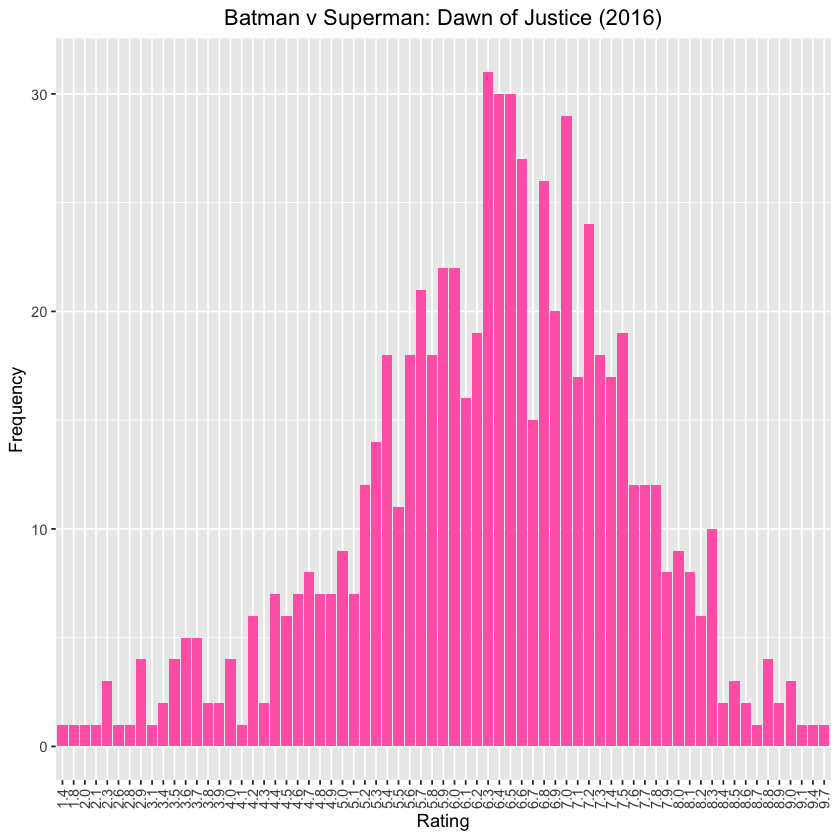

[1] "===================================================="
[1] "Minions (2015)"
[1] "71445"
[1] "neighbors: 656"
[1] "average rating: 6.85128205128206"


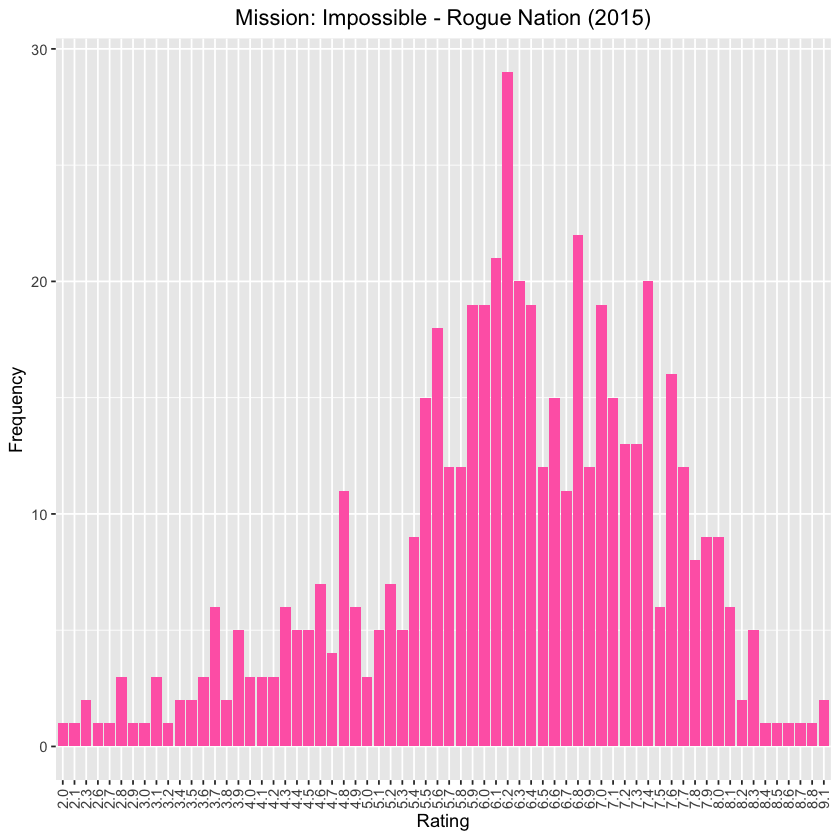

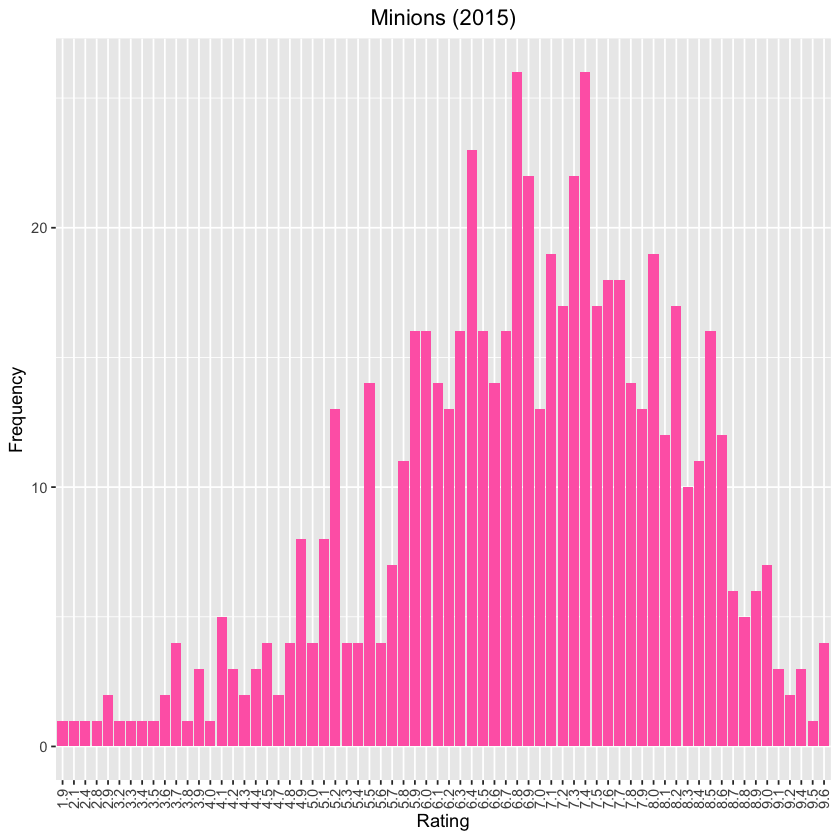

In [188]:
for (i in 1:length(movies)){
    print(paste('===================================================='))
    movie_id = movie_ids[i]
    print(movies[i])
    print(paste(movie_id))
    movie_neighbors = neighbors(weighted_movie_g, movie_id)
    print(paste('neighbors:', length(movie_neighbors)))
    
    sum_rating = 0   
    count = 0
    rating_counter = hash() # use for graph below..
    
    for(j in 1:length(movie_neighbors)){
        neighbor_movie = movie_hash[[movie_neighbors[j]$name]]
        neighbor_movie_rating = rating_hash[[neighbor_movie]]
        
        if (!is.null(neighbor_movie_rating)){
            # because some neighbors don't have rating so... we need to ignore those.
            # R doesn't like it when we add null to numeric...
            sum_rating = sum_rating + as.numeric(neighbor_movie_rating)          
            count = count + 1
            if (is.null(rating_counter[[neighbor_movie_rating]])){
            .set(rating_counter, neighbor_movie_rating, 0)
            }
            
            #add 1 to counter of key
            .set(rating_counter, neighbor_movie_rating, rating_counter[[neighbor_movie_rating]] + 1)
        }


    }
    
    print(paste("average rating:", sum_rating/count))
    
    keys = c()
    values = c()

    for(k in ls(rating_counter)){
        keys = c(keys, k)
        values = c(values, rating_counter[[k]])
    }
    
    df = data.frame(rating=keys, freq=values)
    hist_plot = ggplot(df, aes(x=rating, y=freq))+
    geom_bar(stat = "identity", fill="hotpink")+
    labs(title=movies[i], x="Rating",y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90, hjust = 0.5, vjust = 0.5))
    print(hist_plot)    
        
}